<a href="https://colab.research.google.com/github/teena496/Data-Analyst-Capstone-Project/blob/main/Lab_18_Pie_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib
!pip install seaborn

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [ ]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-04-22 20:16:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  64.5MB/s    in 2.4s    

2025-04-22 20:16:36 (64.5 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



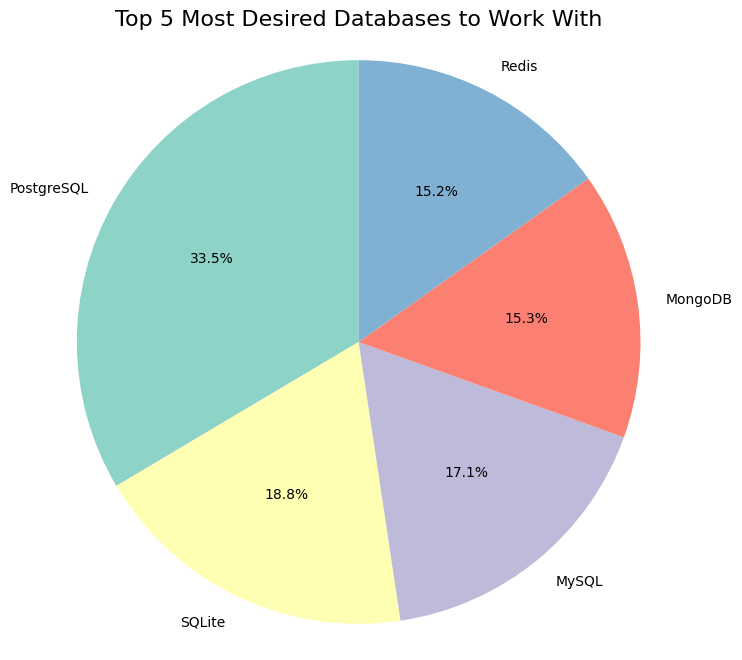

In [ ]:
# Assuming the cleaned data is in df_cleaned and the 'DatabaseWantToWorkWith' column exists

# Step 1: Clean the data by dropping rows with missing values in 'DatabaseWantToWorkWith'
df_cleaned = df.dropna(subset=['DatabaseWantToWorkWith'])

# Step 2: Split the 'DatabaseWantToWorkWith' values by semicolon
df_cleaned_exploded = df_cleaned.assign(DatabaseWantToWorkWith=df_cleaned['DatabaseWantToWorkWith'].str.split(';')).explode('DatabaseWantToWorkWith')

# Step 3: Count frequency of each database
database_counts = df_cleaned_exploded['DatabaseWantToWorkWith'].value_counts()

# Step 4: Get the top 5 most desired databases
top_5_databases = database_counts.head(5)

# Step 5: Create the Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(top_5_databases)))
plt.title('Top 5 Most Desired Databases to Work With', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Show the pie chart
plt.show()


The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



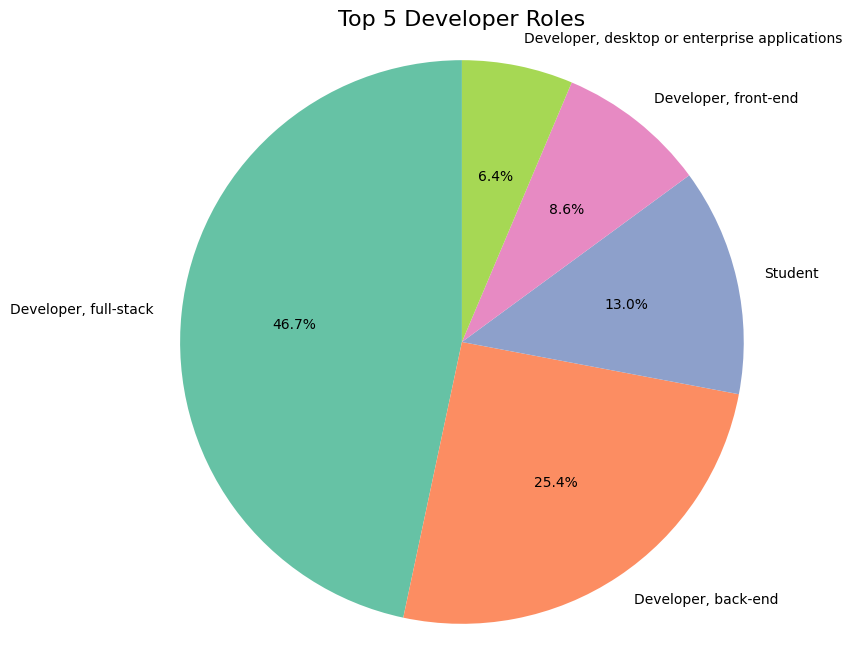

In [ ]:
# Assuming the cleaned data is in df_cleaned and the 'DevType' column exists

# Step 1: Clean the data by dropping rows with missing values in 'DevType'
df_cleaned = df.dropna(subset=['DevType'])

# Step 2: Count the frequency of each developer role
devtype_counts = df_cleaned['DevType'].value_counts()

# Step 3: Get the top 5 most common developer roles
top_5_devtypes = devtype_counts.head(5)

# Step 4: Create the Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_devtypes, labels=top_5_devtypes.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(top_5_devtypes)))
plt.title('Top 5 Developer Roles', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Show the pie chart
plt.show()


##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



In [ ]:
df.columns[df.columns.str.contains('OpSys', case=False, na=False)]


Index(['OpSysPersonal use', 'OpSysProfessional use'], dtype='object')

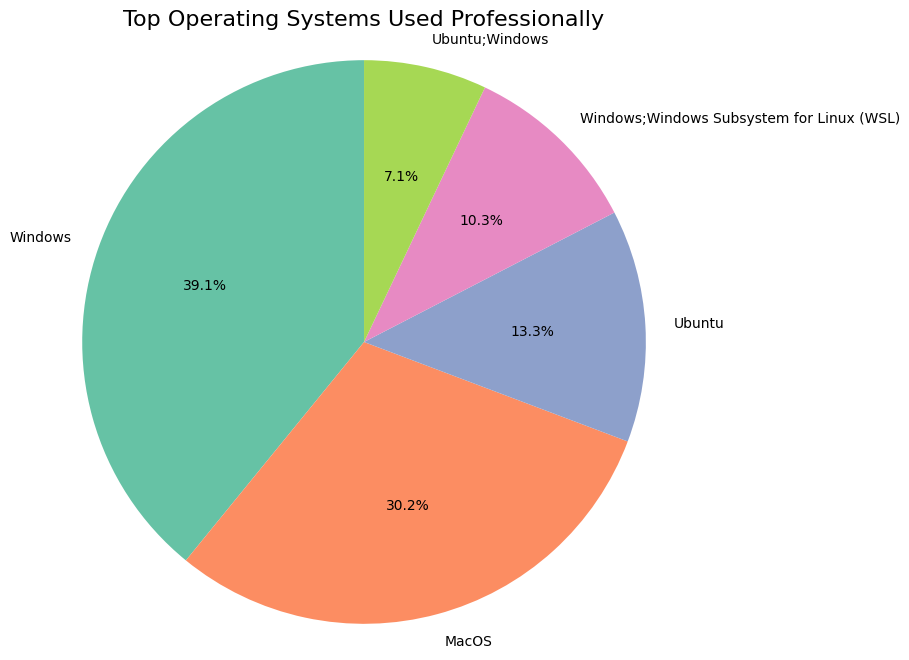

In [ ]:
# Assuming the cleaned data is in df_cleaned and the 'OpSysProfessional' column exists

# Step 1: Clean the data by dropping rows with missing values in 'OpSysProfessional'
df_cleaned = df.dropna(subset=['OpSysProfessional use'])

# Step 2: Count the frequency of each operating system
opsys_counts = df_cleaned['OpSysProfessional use'].value_counts()

# Step 3: Get the top operating systems (you can limit it to the top 5, or show all)
top_opsys = opsys_counts.head(5)  # Top 5 operating systems

# Step 4: Create the Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_opsys, labels=top_opsys.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(top_opsys)))
plt.title('Top Operating Systems Used Professionally', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Show the pie chart
plt.show()


### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



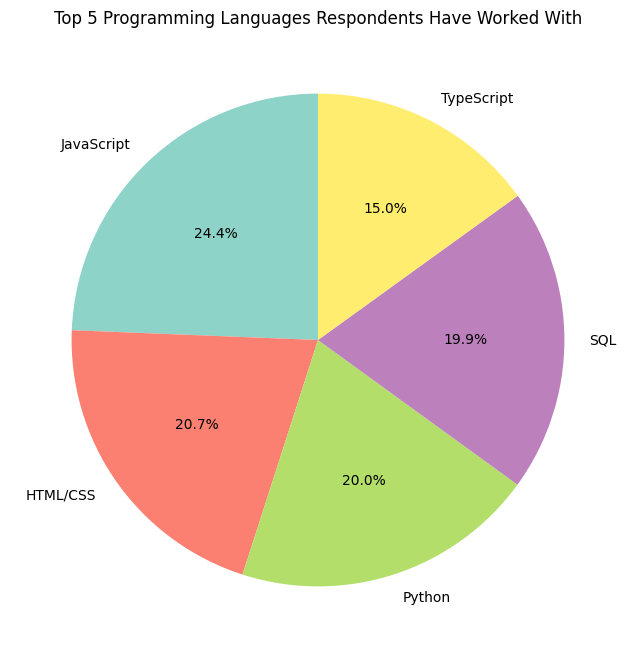

In [ ]:
##Write your code here
# Step 1: Extract the 'LanguageHaveWorkedWith' column and split languages
language_data = df['LanguageHaveWorkedWith'].dropna()  # Remove missing values

# Split languages into lists and explode them into separate rows
language_split = language_data.str.split(';').explode()

# Step 2: Count occurrences of each language
language_counts = language_split.value_counts()

# Step 3: Get the top 5 most popular languages
top_5_languages = language_counts.head(5)

# Step 4: Plot the pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
top_5_languages.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Top 5 Programming Languages Respondents Have Worked With')
plt.ylabel('')  # Hide y-axis label for aesthetics
plt.show()


##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



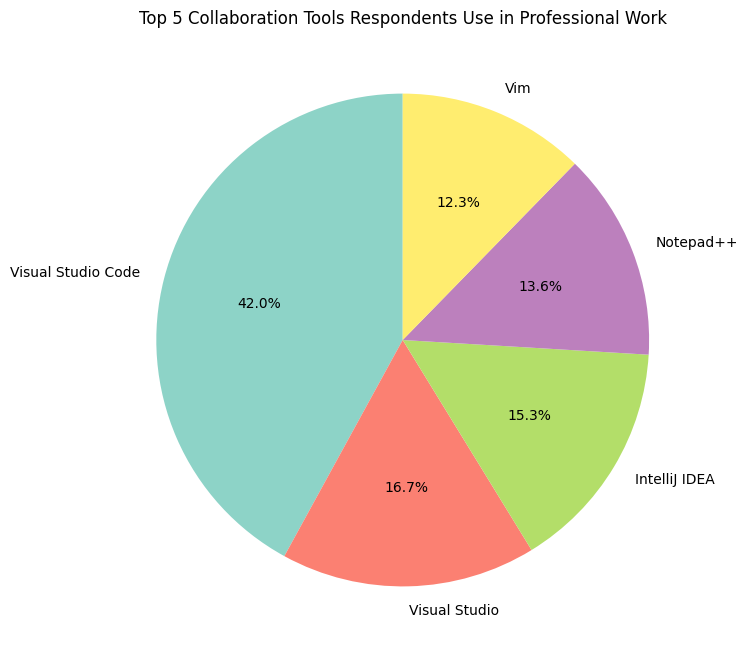

In [ ]:
##Write your code here
# Step 1: Extract the 'NEWCollabToolsHaveWorkedWith' column and split tools
collab_tools_data = df['NEWCollabToolsHaveWorkedWith'].dropna()  # Remove missing values

# Split the tools into lists and explode them into separate rows
collab_tools_split = collab_tools_data.str.split(';').explode()

# Step 2: Count occurrences of each tool
collab_tools_counts = collab_tools_split.value_counts()

# Step 3: Get the top 5 most popular tools
top_5_collab_tools = collab_tools_counts.head(5)

# Step 4: Plot the pie chart
plt.figure(figsize=(8, 8))
top_5_collab_tools.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Top 5 Collaboration Tools Respondents Use in Professional Work')
plt.ylabel('')  # Hide y-axis label for aesthetics
plt.show()


### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



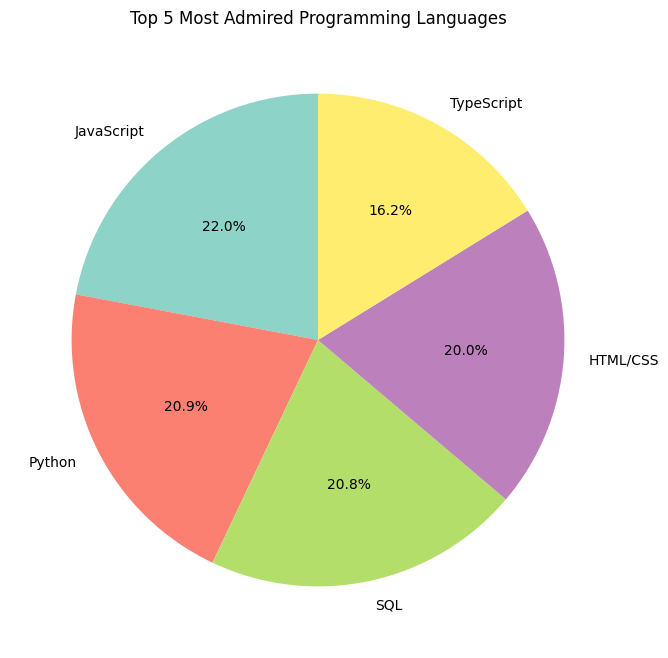

In [ ]:
##Write your code here
# Step 1: Extract the 'LanguageAdmired' column and split languages
admired_languages_data = df['LanguageAdmired'].dropna()  # Remove missing values

# Split the languages into lists and explode them into separate rows
admired_languages_split = admired_languages_data.str.split(';').explode()

# Step 2: Count occurrences of each admired language
admired_languages_counts = admired_languages_split.value_counts()

# Step 3: Get the top 5 most admired languages
top_5_admired_languages = admired_languages_counts.head(5)

# Step 4: Plot the pie chart
plt.figure(figsize=(8, 8))
top_5_admired_languages.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Top 5 Most Admired Programming Languages')
plt.ylabel('')  # Hide y-axis label for aesthetics
plt.show()


##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



In [ ]:

df.columns[df.columns.str.contains('AIToolCurrently', case=False, na=False)]
df['AIToolCurrently Using'].unique()

array([nan,
       'Learning about a codebase;Project planning;Writing code;Documenting code;Debugging and getting help;Deployment and monitoring;Search for answers;Generating content or synthetic data',
       'Writing code;Debugging and getting help', ...,
       'Learning about a codebase;Project planning;Writing code;Debugging and getting help;Testing code;Committing and reviewing code;Deployment and monitoring;Predictive analytics;Search for answers;Generating content or synthetic data;Other (please specify):',
       'Learning about a codebase;Project planning;Writing code;Testing code;Committing and reviewing code;Search for answers;Generating content or synthetic data;Other (please specify):',
       'Learning about a codebase;Writing code;Committing and reviewing code;Deployment and monitoring;Predictive analytics;Search for answers'],
      shape=(1311,), dtype=object)

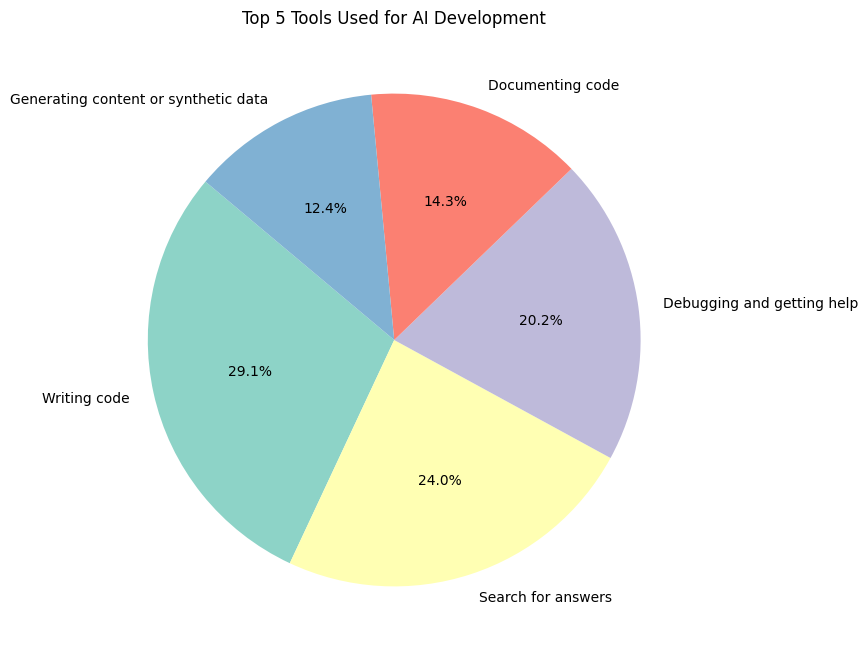

In [ ]:
# Drop missing values in the 'AIToolCurrently' column
ai_tools_data = df['AIToolCurrently Using'].dropna()

# Split the semicolon-separated values into individual tools and explode into separate rows
ai_tools_split = ai_tools_data.str.split(';').explode()

# Count the frequency of each tool
ai_tool_counts = ai_tools_split.value_counts()

# Select the top 5 most used AI tools
top_5_ai_tools = ai_tool_counts.head(5)

# Plot the pie chart
plt.figure(figsize=(8, 8))
top_5_ai_tools.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Top 5 Tools Used for AI Development')
plt.ylabel('')  # Hide y-label for better visual
plt.show()


##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



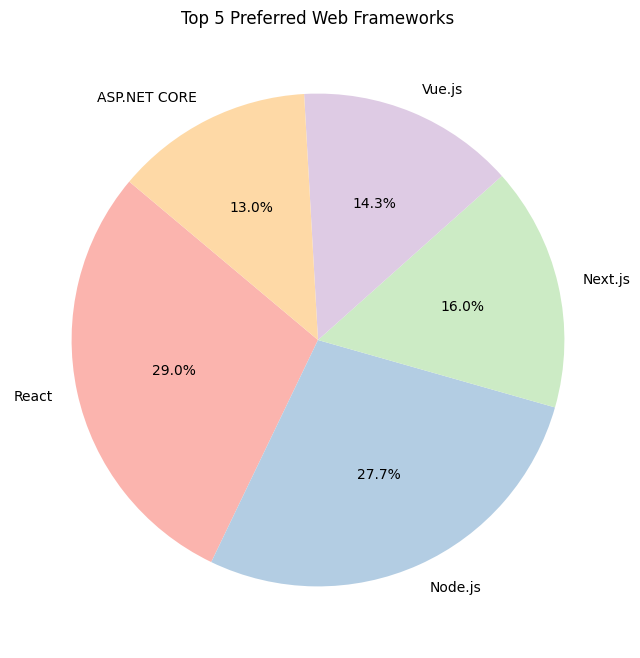

In [ ]:
# Drop missing values
web_frameworks_data = df['WebframeWantToWorkWith'].dropna()

# Split semicolon-separated values into a list and explode into individual rows
web_frameworks_split = web_frameworks_data.str.split(';').explode()

# Count frequency of each web framework
web_frameworks_counts = web_frameworks_split.value_counts()

# Get top 5 web frameworks
top_5_web_frameworks = web_frameworks_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
top_5_web_frameworks.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Top 5 Preferred Web Frameworks')
plt.ylabel('')  # Hide the y-axis label
plt.show()


##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



In [ ]:
##Write your code here

### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
